In [ ]:
# !pip install darts

In [119]:
from darts import TimeSeries
from darts.models import ExponentialSmoothing
import numpy as np


In [120]:
# 임의의 시계열 데이터 생성
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
data = np.array(data)
series = TimeSeries.from_values(values=data)

In [121]:
# 모델 생성 및 학습
model = ExponentialSmoothing(seasonal=None)  # 데이터가 부족해서 계절성을 비활성화
model.fit(series)

ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=None, seasonal_periods=None, random_state=0, kwargs=None)

In [122]:
# 예측 수행
prediction = model.predict(n=5)  # n=몇번예측인지

In [123]:
# 예측 결과 출력
print(prediction.values())

[[11.]
 [12.]
 [13.]
 [14.]
 [15.]]


In [124]:
import pandas as pd
data = pd.read_excel('../study_project/Data/Data_analysis/data/index_Infomation_v0.1.xlsx')

In [125]:
df = data[['Date', 'apple_Close']]
df

,Date,apple_Close
0,2014-01-02,19.754642
1,2014-01-03,19.320715
2,2014-01-04,19.320715
3,2014-01-05,19.320715
4,2014-01-06,19.426071
...,...,...
3828,2024-06-26,213.250000
3829,2024-06-27,214.100006
3830,2024-06-28,210.619995
3831,2024-06-29,210.619995


In [126]:
# 데이터 및 모델 세팅
series = TimeSeries.from_values(values=df['apple_Close'])
model = ExponentialSmoothing()
model.fit(series)

# 예측 수행
prediction = model.predict(n=90)  # n=몇번예측인지
print(prediction.values())

[[210.65655833]
 [210.79793816]
 [210.90546644]
 [211.01172634]
 [210.92094124]
 [211.01463565]
 [211.09321332]
 [211.08143379]
 [210.97687821]
 [211.23407863]
 [211.25599772]
 [211.21716083]
 [211.25476694]
 [211.39614677]
 [211.50367505]
 [211.60993495]
 [211.51914985]
 [211.61284425]
 [211.69142193]
 [211.6796424 ]
 [211.57508682]
 [211.83228724]
 [211.85420633]
 [211.81536944]
 [211.85297555]
 [211.99435538]
 [212.10188366]
 [212.20814356]
 [212.11735846]
 [212.21105286]
 [212.28963054]
 [212.277851  ]
 [212.17329543]
 [212.43049585]
 [212.45241494]
 [212.41357805]
 [212.45118416]
 [212.59256399]
 [212.70009227]
 [212.80635217]
 [212.71556706]
 [212.80926147]
 [212.88783915]
 [212.87605961]
 [212.77150404]
 [213.02870446]
 [213.05062355]
 [213.01178665]
 [213.04939277]
 [213.1907726 ]
 [213.29830088]
 [213.40456078]
 [213.31377567]
 [213.40747008]
 [213.48604776]
 [213.47426822]
 [213.36971265]
 [213.62691307]
 [213.64883216]
 [213.60999526]
 [213.64760138]
 [213.78898121]
 [213.89

In [127]:
prediction_values = []
for i in prediction.values():
    for j in i:
        prediction_values.append(j)
prediction_values

[210.6565583324782,
 210.79793816079976,
 210.9054664400492,
 211.01172633930636,
 210.9209412377066,
 211.0146356452396,
 211.0932133215612,
 211.08143378616916,
 210.97687821412813,
 211.23407863333028,
 211.2559977211585,
 211.2171608271689,
 211.2547669414761,
 211.39614676979767,
 211.5036750490471,
 211.60993494830427,
 211.5191498467045,
 211.61284425423753,
 211.6914219305591,
 211.67964239516706,
 211.57508682312604,
 211.8322872423282,
 211.85420633015642,
 211.8153694361668,
 211.852975550474,
 211.99435537879558,
 212.101883658045,
 212.20814355730218,
 212.1173584557024,
 212.2110528632354,
 212.289630539557,
 212.27785100416497,
 212.17329543212395,
 212.4304958513261,
 212.45241493915432,
 212.4135780451647,
 212.45118415947192,
 212.59256398779348,
 212.70009226704292,
 212.8063521663001,
 212.7155670647003,
 212.80926147223335,
 212.88783914855492,
 212.87605961316288,
 212.77150404112186,
 213.028704460324,
 213.05062354815223,
 213.01178665416262,
 213.04939276846983

In [128]:
predict_data = {
    'Date': pd.date_range(start='2024-07-01', periods=90, freq='D'),
    'predict_value': prediction_values
}

predict_df = pd.DataFrame(predict_data)
predict_df

,Date,predict_value
0,2024-07-01,210.656558
1,2024-07-02,210.797938
2,2024-07-03,210.905466
3,2024-07-04,211.011726
4,2024-07-05,210.920941
...,...,...
85,2024-09-24,214.985398
86,2024-09-25,215.092927
87,2024-09-26,215.199187
88,2024-09-27,215.108402


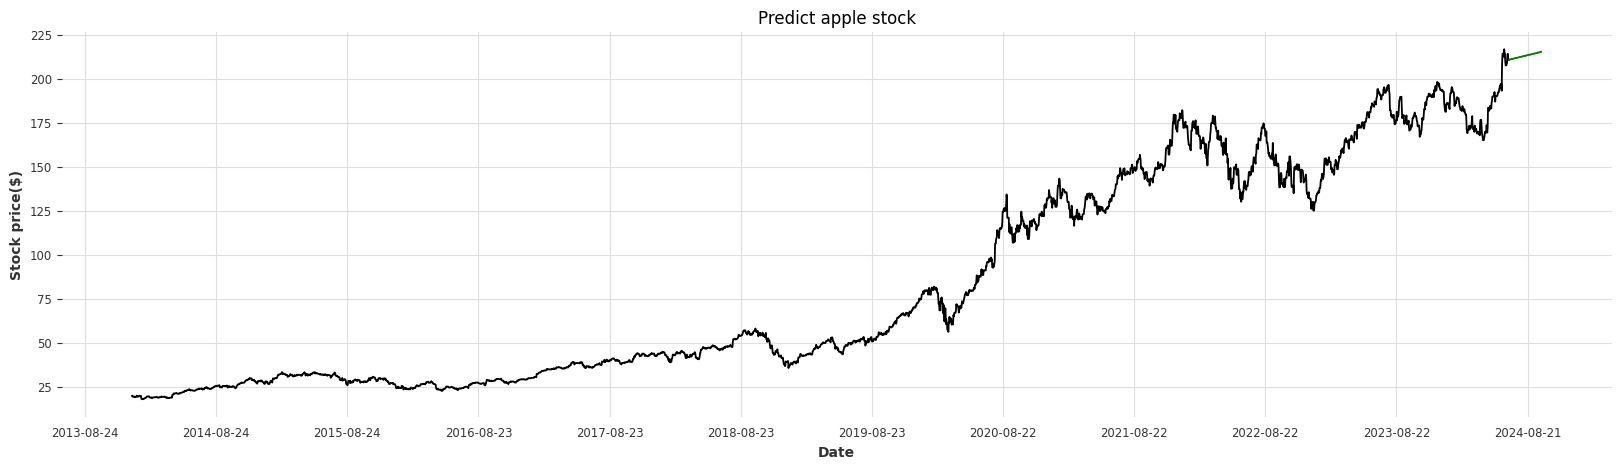

In [129]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

real_value = df['apple_Close']
real_date = df['Date']
predict_value = predict_df['predict_value']
predict_date = predict_df['Date']

# 'date' 컬럼을 datetime 형식으로 변환
real_date = pd.to_datetime(real_date)
predict_date = pd.to_datetime(predict_date)

# 그래프 그리기
plt.figure(figsize=(20,5))
plt.plot(real_date, real_value)
plt.plot(predict_date, predict_value, color='g')

# 날짜 형식 자동 설정
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=365))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# 그래프 제목 및 레이블 설정
plt.title('Predict apple stock')
plt.xlabel('Date')
plt.ylabel('Stock price($)')

plt.show()

In [130]:
# 전체 데이터 중 80%를 훈련데이터로, 20%를 테스트 데이터로 나누기
df.set_index('Date', inplace=True)
train_size = int(len(df) * 0.8)
train = df['apple_Close'][:train_size]
test = df['apple_Close'][train_size:]

In [132]:
train

Date
2014-01-02     19.754642
2014-01-03     19.320715
2014-01-04     19.320715
2014-01-05     19.320715
2014-01-06     19.426071
                 ...    
2022-05-21    137.589996
2022-05-22    137.589996
2022-05-23    143.110001
2022-05-24    140.360001
2022-05-25    140.520004
Name: apple_Close, Length: 3066, dtype: float64

In [131]:
# ExponentialSmoothing 모델 생성 및 훈련
model = ExponentialSmoothing(
    train,
    trend='add',
    seasonal='add',
    seasonal_periods=12
).fit()

TypeError: ExponentialSmoothing.fit() missing 1 required positional argument: 'series'

In [ ]:
# 하이퍼파라미터 그리드 설정
param_grid = {
    'trend': [None, 'add', 'mul'],  # 트렌드
    'seasonal': [None, 'add', 'mul'],  # 계절성
    'seasonal_periods': [4, 12],
    'damped_trend': [True, False]
}

# 최적의 하이퍼파라미터 초기화
best_score = float('inf')
best_params = None
best_model = None

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error

# 그리드 서치 수행
for params in ParameterGrid(param_grid):
    try:
        model = ExponentialSmoothing(
            train,
            trend=params['trend'],
            seasonal=params['seasonal'],
            seasonal_periods=params['seasonal_periods'],
            damped_trend=params['damped_trend']
        ).fit()

        predictions = model.forecast(len(test))
        score = mean_squared_error(test, predictions)

        if score < best_score:
            best_score = score
            best_params = params
            best_model = model

    except Exception as e:
        print(f"Error with parameters {params}: {e}")